<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *7*: *Imbalanced Classification & NN***

### **Tenggat Waktu: 8 Mei 2024, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: A_Lab7_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **8 Mei 2024, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [1]:
# Isi dengan data diri Anda
NAMA = "Sri Saraswati Widhisari"
KELAS = "B"
NPM = "2206812180"
USERNAME_KAGGLE = "posty_melek"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sri Saraswati Widhisari dari kelas B dengan NPM 2206812180, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sri Saraswati Widhisari)


# Import Library

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone

# Imbalanced Classification

Selama ini kita mempelajari metode klasifikasi dengan asumsi bahwa *dataset* yang digunakan untuk *training* seimbang. Artinya, distribusi kelas pada dataset cenderung sama. Distribusi kelas disini mengacu kepada jumlah data pada masing-masing kelas. Namun, ternyata distribusi kelas yang sama sangat jarang ditemui pada dunia nyata. Misalnya, pada sebuah problem klasifikasi apakah sebuah email spam (positif) atau tidak (negatif), email yang normal pasti lebih sering didapatkan dibanding yang spam. Ini mengakibatkan dataset yang digunakan lebih banyak distribusinya pada kelas email normal dibanding yang spam. Hal ini menyebabkan performa klasifikasi lebih terpengaruh oleh kelas yang lebih banyak **(kelas mayoritas)** padahal sebenarnya kita ingin melakukan klasifikasi pada kelas yang sedikit **(kelas minoritas)**. Dalam konteks contoh tadi, maka jika diberi sebuah email baru, model klasifikasi akan cenderung mengklasifikasikannya sebagai email yang normal **(kelas mayoritas)**.

Nah, pada lab kali ini kita akan mempelajari ***imbalanced classification***, dimana distribusi antar kelasnya tidak sama pada dataset training yang digunakan. Berdasarkan tingkat signifikansi keseimbangannya, terdapat 2 jenis imbalanced classification, yaitu:
1. Slight Imbalance: Distribusi antar kelas pada dataset training yang tidak terlalu jauh berbeda (4:6)
2. Severe Imbalance: Distribusi antar kelas pada dataset training yang lumayan jauh berbeda (1:100 atau lebih)

Perlu diperhatikan bahwa severe imbalance akan sangat mempengaruhi performa dari model klasifikasi, sehingga harus dilakukan penyeimbangan pada dataset terlebih dahulu antara kelas mayoritas dan minoritas.
Untuk mengatasi hal masalah imbalanced ini, langkah yang harus dilakukan adalah di antaranya adalah:
- Menambah sampel data pada kelas minoritas ***(Oversampling)***
, atau
- Mengurangi sampel data pada kelas mayoritas ***(Undersampling)***

Untuk mensimulasikan sebuah dataset yang imbalance, kita dapat menggunakan method `make_classification` dari library `scikit-learn`.
Berikut merupakan contoh dataset yang slight imbalance dan severe imbalance.

#### Slight Imbalance
Perbandingan data pada kelas mayoritas dan minoritas adalah 6:4

In [4]:
# Mensimulasikan dataset slight imbalance
X_slight, y_slight = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.6], # ratio 4:6
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_slight = Counter(y_slight)
print(counter_y_slight)

Counter({0: 6000, 1: 4000})


#### Severe Imbalance
Perbandingan data pada kelas mayoritas dan minoritas adalah 99:1

In [5]:
# Mensimulasikan dataset slight imbalance
X_severe, y_severe = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.99], # ratio 99:1
    class_sep=0.1,
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_severe = Counter(y_severe)
print(counter_y_severe)

Counter({0: 9900, 1: 100})


#### Visualisasi scatter plot slight imbalance dan severe imbalance dataset

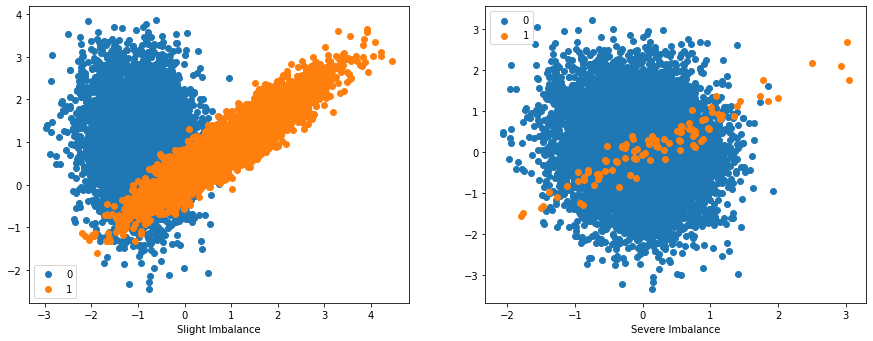

In [6]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.xlabel('Slight Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_slight == label)[0]
    plt.scatter(X_slight[row_ix, 0], X_slight[row_ix, 1], label=str(label))
    plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Severe Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_severe == label)[0]
    plt.scatter(X_severe[row_ix, 0], X_severe[row_ix, 1], label=str(label))
    plt.legend()

plt.show()

Terlihat dengan jelas perbedaan slight imbalance dan severe imbalance pada visualisasi scatter plot di atas. Perbandingan jumlah data pada kelas mayoritas dan kelas minoritas pada severe imbalance dataset lebih besar (99:1) daripada slight imbalance dataset (6:4).

## Pengaruh Imbalance Dataset Terhadap Performa Model Klasifikasi

Imbalance dataset akan berpengaruh kepada performa model klasifikasi yang digunakan.
Kita akan menggunakan model Decision Tree dan mengevaluasi model tersebut untuk dataset slight imbalance dan severe imbalance menggunakan beberapa metriks evaluasi. Perhatikan contoh di bawah untuk memahami lebih lanjut.

1. Evaluasi Model Decision Tree Dengan Slight Imbalance Dataset

#### Metode Cross Validation
Evaluasi model di bawah ini akan menggunakan Stratified K-Fold Cross Validation dengan beberapa metrik evaluasi di antaranya: accuracy, f1 (macro), precision (macro), recall (macro).

Disini data - data sintetis hasil penambahan oversampling akan dilibatkan dalam evaluasi model, maka dari itu kita menggunakan Stratified K-Fold Cross Validation. Stratified K-Fold Cross Validation membagi dataset menjadi sejumlah k fold dataset, dimana k fold dataset itu dibagi menjadi training dan validation test dataset. Pada Stratified K-Fold Cross Validation, distribusi kelas pada setiap fold akan dibuat seproporsional mungkin, sehingga folds yang merupakan validation test dataset akan memiliki distribusi kelas yang hampir sama.

In [7]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_slight, y_slight, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9243
f1_macro score: 0.9205069112926487
precision_macro score: 0.9213572892310913
recall_macro score: 0.9207916666666668


2. Evaluasi Model Decision Tree Dengan Severe Imbalance Dataset

In [8]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.983
f1_macro score: 0.5576442326545688
precision_macro score: 0.5540769914790048
recall_macro score: 0.5458585858585859


Berdasarkan hasil evaluasi model di atas, bisa dilihat bahwa akurasi dari kedua dataset sangat tinggi. Dapat kita ingat lagi bahwa metriks akurasi dipengaruhi oleh semua prediksi yang benar, baik itu kelas yang mau kita prediksi di awal (positif) atau yang bukan (negatif). Pada slight imbalance, skor akurasi dan skor metriks - metriks lainnya tidak berbeda secara signifikan. Hal ini terjadi karena model klasifikasi memperoleh informasi yang cukup dari kedua buah kelas walaupun terdapat sedikit perbedaan distribusi kelas. Akibatnya, model bisa memprediksi dengan cukup baik pada kelas minoritasnya. Namun, pada severe imbalance dataset, skor recall, precision, dan f1 score jauh lebih rendah dibanding skor akurasi yang berarti model hanya akurat dalam memprediksi kelas secara keseluruhan, tetapi kurang akurat dalam memprediksi kelas minoritas. Dalam konteks imbalance dataset yang dimana kelas minoritas adalah kelas yang ingin diprediksi (positif), kita tidak bisa menggunakan metriks akurasi sebagai acuan performa model. Kelas mayoritas akan sangat mempengaruhi performa model, sehingga informasi yang didapatkan dari kelas minoritas terabaikan.

Salah satu contoh dunia nyata dari dataset dengan kelas minoritas yang ingin diprediksi adalah email yang spam dan tidak spam. Tujuan kita membuat model pada konteks permasalahan tersebut adalah dengan tepat memprediksi email spam yang masuk sebagai email spam. Namun, karena email spam jumlah datanya sedikit pada dataset (kelas minoritas), metriks akurasi tidak disarankan dipakai untuk mengevaluasi model klasifikasi dari contoh tersebut. Akurasi yang tinggi pada model klasifikasi di contoh tersebut bisa saja akibat dari banyaknya email yang non spam yang masuk yang diprediksi benar sebagai non spam. Walaupun cuman ada 5% email spam yang masuk dan anggaplah model kita gagal memprediksi semua email tersebut sebagai email spam, akurasi model kita juga tetap tinggi di angka 95%. Namun, jika kita menggunakan metriks f1 score, maka evaluasi model hanya akan mempertimbangkan email spam yang diprediksi benar sebagai email spam saja, sehingga lebih relevan dengan tujuan awal model dibuat.

![Imbalance Dataset Accuracy vs F1 Score](https://i.imgflip.com/8dfrug.jpg)

*Sumber: https://imgflip.com/i/8dfrug*


Selanjutnya, kita akan menggunakan **dataset severe imbalance** untuk mempelajari masing-masing tipe dari penanganan imbalance dataset

In [9]:
X = X_severe
y = y_severe

In [10]:
# Jalankan method ini yang berguna untuk memvisualisasikan dataset yang sudah disimulasikan
def show_simulated_dataset(X, y):
    counter_y = Counter(y)
    plt.figure(figsize=(12, 10))

    for label, _ in counter_y.items():
        row_ix = where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
        plt.legend()
    plt.show()

In [11]:
# Jalankan method ini yang berguna untuk memvisualisasikan perbandingan dua buat dataset
def show_simulated_dataset_comparison(X1, X2, y1, y2, title1='Original dataset', title2='Sampling Dataset'):
    counter_y1 = Counter(y1)
    counter_y2 = Counter(y2)
    plt.figure(figsize=(15, 12))
    plt.subplot(2,2,1)
    plt.xlabel(title1)

    for label, _ in counter_y1.items():
        row_ix = where(y1 == label)[0]
        plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=str(label))
        plt.legend()

    plt.subplot(2,2,2)
    plt.xlabel(title2)

    for label, _ in counter_y2.items():
        row_ix = where(y2 == label)[0]
        plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=str(label))
        plt.legend()

    plt.show()

## Oversampling

Oversampling berarti **menambah sampel data yang berasal dari kelas minoritas pada dataset**. Secara metode penambahan data, oversampling dapat dibedakan menjadi 2 tipe, yaitu penduplikasian data dan pembuatan data sintetik.

Salah satu metode penduplikasian data adalah **random oversampling**, sedangkan contoh metode pembuatan data sintetik antara lain:
- Synthetic Minority Oversampling Technique (SMOTE),
- Borderline-SMOTE,
- Borderline Oversampling with SVM, dan
- Adaptive Synthetic Sampling (ADASYN).

Selanjutnya, kita akan menelusuri definisi sederhana serta implementasi kelima metode oversampling tersebut dalam dataset simulasi kita. Untuk penjelasan lebih lengkapnya, Anda dapat membaca kembali slide perkuliahan atau mencari referensi lain melalui internet.   

### Random Oversampling

Random undersampling merupakan metode penambahan data yang berada pada kelas minoritas yang dilakukan dengan menduplikasikan data yang sudah ada secara acak. Data - data baru hasil penduplikasian ini tidak akan menambah informasi baru kepada dataset.

Counter({0: 9900, 1: 9900})


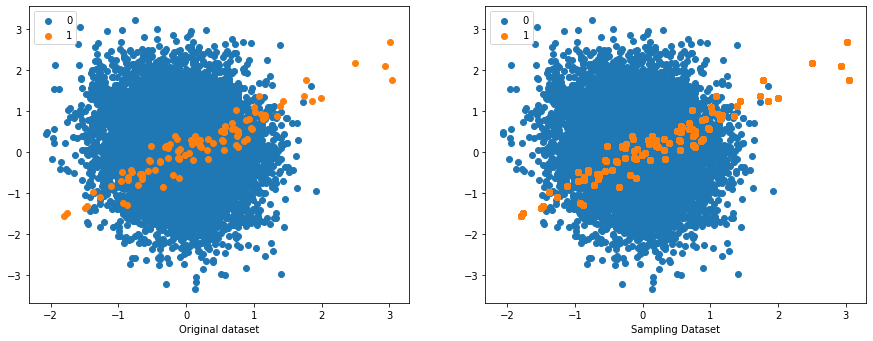

In [12]:
# Definisi random undersampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling berdasarkan dataset simulasi
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_rand_over, y1=y, y2=y_rand_over)

Sekilas tidak ada perbedaan antara dataset asli dan dataset yang telah dilakukan random oversampling. Hal ini terjadi karena data pada kelas minoritas diduplikasikan pada titik yang sama, sehingga menghasilkan data data baru yang tertumpuk pada titik yang sama. Maka dari itu, tidak terlihat perbedaan antara dataset asli dan dataset sampling.

### Synthetic Minority Oversampling Technique (SMOTE)

SMOTE membentuk data baru dengan menggabungkan data pada kelas minoritas dengan data tetangganya. Data baru yang dihasilkan akan berada pada garis yang menghubungkan data asli pada kelas minoritas.

![SMOTE](https://i.ibb.co/MV143tn/Screenshot-2024-04-23-132339.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.37*

Counter({0: 9900, 1: 9900})


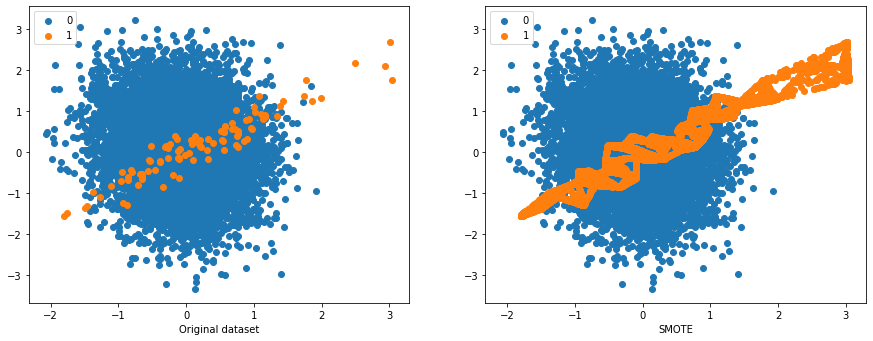

In [13]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling berdasarkan dataset simulasi
X_smote, y_smote = smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_smote,
                                  y1=y, y2=y_smote,
                                  title2='SMOTE')

### Borderline-SMOTE

Variasi dari metode SMOTE yang hanya memperbanyak data sintetis pada data pada kelas minoritas yang *missclassified* sebagai kelas mayoritas, misal dengan menggunakan K-nearest neighbor model. Data - data pada kelas mintoritas yang *missclassified* ini berdekatan dengan data - data pada kelas mayoritas.  

Counter({0: 9900, 1: 9900})


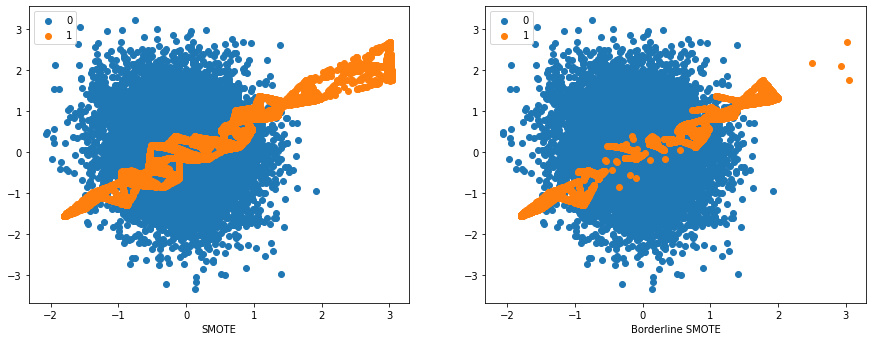

In [14]:
# Definisi Borderline SMOTE class
borderline_smote = BorderlineSMOTE()

# Resampling berdasarkan dataset simulasi
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

# Perbandingan scatter plot antara dataset SMOTE dan dataset Borderline SMOTE
show_simulated_dataset_comparison(X1=X_smote, X2=X_borderline_smote,
                                  y1=y_smote, y2=y_borderline_smote,
                                  title1='SMOTE', title2='Borderline SMOTE')

### Borderline Oversampling with SVM

Dibandingkan menggunakan KNN model untuk melakukan preklasifikasi data minoritas yang akan dioversampling, metode ini menggunakan algoritma Support Vector Machine (SVM).

Counter({0: 9900, 1: 9900})


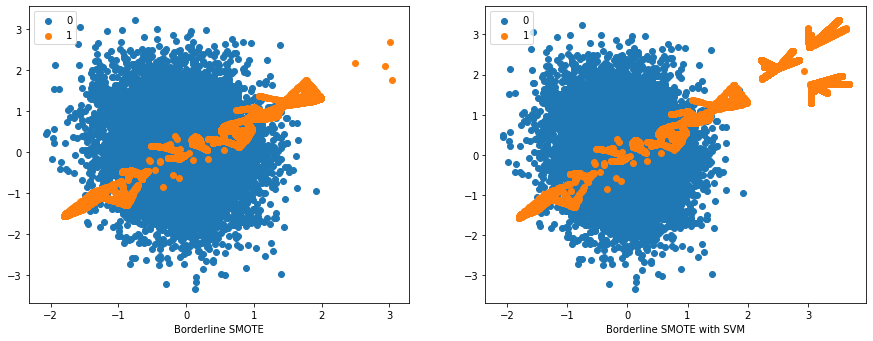

In [15]:
# Definisi Borderline SMOTE dengan SVM class
svm_smote = SVMSMOTE()

# Resampling berdasarkan dataset simulasi
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

# Perbandingan scatter plot antara dataset Borderline SMOTE dan dataset Borderline SMOTE with SVM
show_simulated_dataset_comparison(X1=X_borderline_smote, X2=X_svm_smote,
                                  y1=y_borderline_smote, y2=y_svm_smote,
                                  title1='Borderline SMOTE', title2='Borderline SMOTE with SVM')

### Adaptive Synthetic Sampling (ADASYN)

Pendekatan lain yang melibatkan pembuatan sampel data sintetik yang berbanding terbalik dengan jumlah sampel data di kelas minoritas. Artinya, menghasilkan lebih banyak data sintetik di wilayah ruang fitur yang jumlah data pada kelas minoritasnya rendah, dan lebih sedikit atau tidak ada sama sekali jika jumlah data pada kelas minoritasnya banyak.

Counter({1: 9925, 0: 9900})


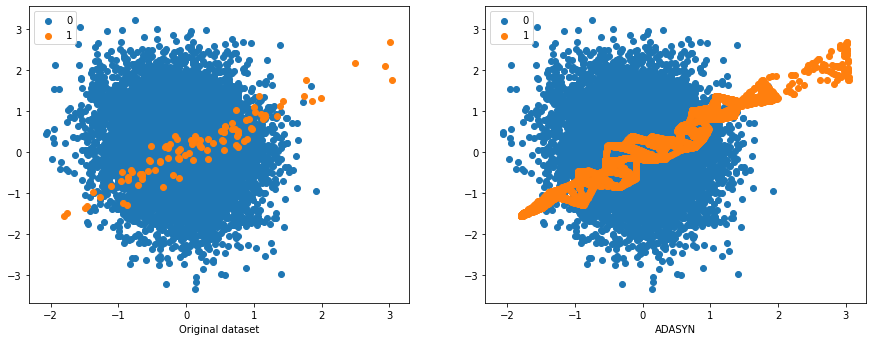

In [16]:
# Definisi ADASYN class
adasyn = ADASYN()

# Resampling berdasarkan dataset simulasi
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_adasyn,
                                  y1=y, y2=y_adasyn,
                                  title2='ADASYN')

## Undersampling

Undersampling merupakan **mengurangi data yang berasal dari kelas mayoritas**. Tujuannya adalah sama seperti oversampling, yaitu untuk menyeimbangkan distribusi kelas pada dataset. Beberapa metode undersampling di antaranya:
- Random Undersampling,
- Near Miss Undersampling, dan
- Tomek Link Undersampling.

Mari kita telusuri satu per satu ketiga metode undersampling di atas dengan memberikan definisi sederhana dan implementasi langsungnya menggunakan dataset simulasi yang sudah ada.

### Random Undersampling

Random undersamplng akan melakukan pengambilan sampel acak dari kelas mayoritas dan menghapusnya dari dataset.

Counter({0: 100, 1: 100})


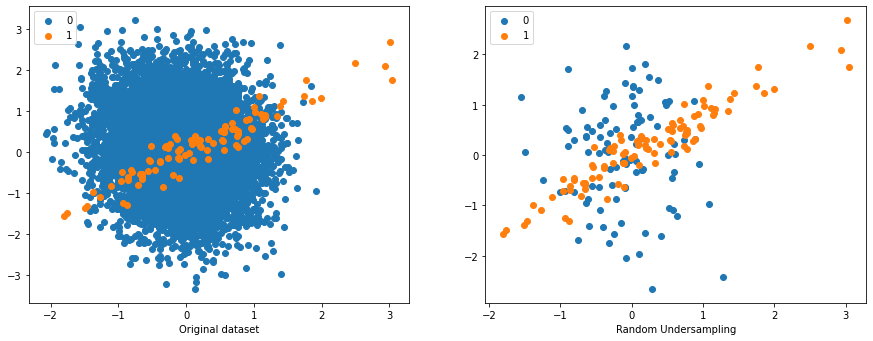

In [17]:
# Definisi ADASYN class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling berdasarkan dataset simulasi
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_rand_under,
                                  y1=y, y2=y_rand_under,
                                  title2='Random Undersampling')

### Near Miss Undersampling

Near Miss mengacu pada metode undersampling yang memilih sampel data berdasarkan jarak data pada kelas mayoritas ke data pada kelas minoritas.Terdapat tiga versi penerapan Near Miss, di antaranya:

#### NearMiss-1

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke tiga sampel kelas minoritas terdekat.

Counter({0: 100, 1: 100})


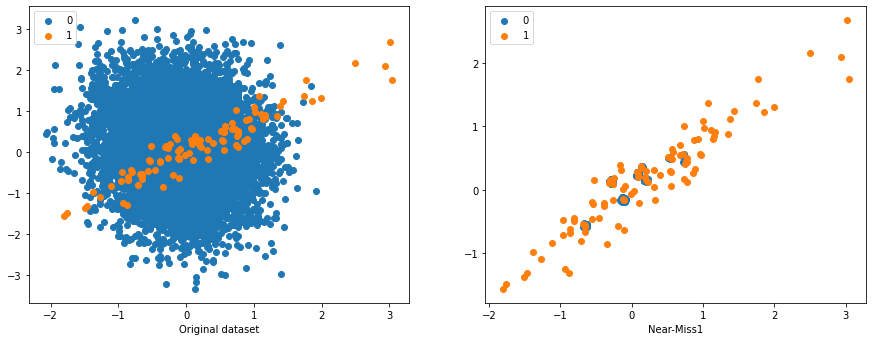

In [18]:
# Definisi Near Miss 1 class
nearmiss = NearMiss()

# Resampling berdasarkan dataset simulasi
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss1
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss,
                                  y1=y, y2=y_nearmiss,
                                  title2='Near-Miss1')

#### NearMiss-2

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terbesar ke tiga sampel kelas minoritas terdekat.

Counter({0: 100, 1: 100})


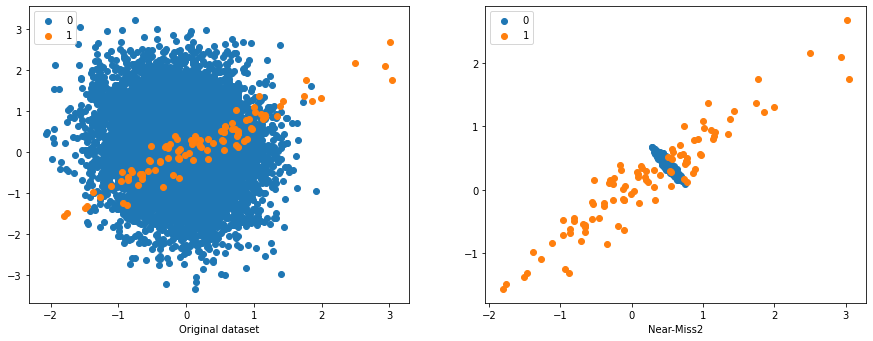

In [19]:
# Definisi Near Miss 2 class
nearmiss2 = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss2
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss2,
                                  y1=y, y2=y_nearmiss2,
                                  title2='Near-Miss2')

#### NearMiss-3

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke setiap sampel kelas minoritas.

Counter({0: 100, 1: 100})


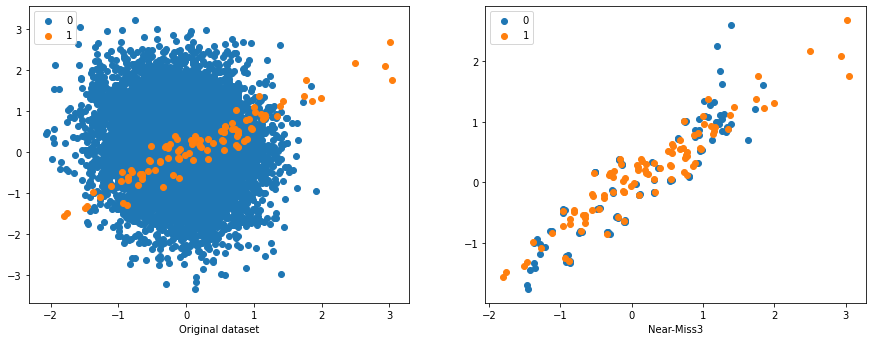

In [20]:
# Definisi Near Miss 3 class
nearmiss3 = NearMiss(version=3)

# Resampling berdasarkan dataset simulasi
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss3
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss3,
                                  y1=y, y2=y_nearmiss3,
                                  title2='Near-Miss3')

#### Tomek Link Undersampling

Tomek Link undersampling akan menghapus sampel kelas mayoritas yang merupakan **Tomek Link**, dimana sampel a dan b dikatakan Tomek Link jika:
1. Nearest neighbor sampel a adalah b,
2. Nearest neighbor sampel b adalah a, dan
3. Sampel a dan b berada pada kelas yang berbeda.

Counter({0: 9847, 1: 100})


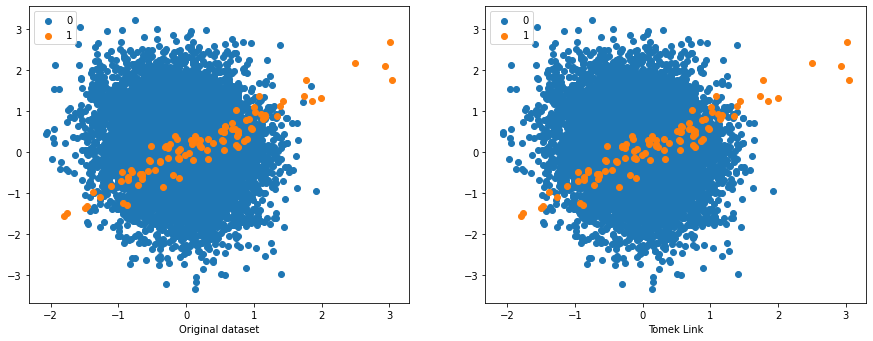

In [21]:
# Definisi Tomek Link class
tomek = TomekLinks()

# Resampling berdasarkan dataset simulasi
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

# Perbandingan scatter plot antara dataset asli dan dataset Tomek Link
show_simulated_dataset_comparison(X1=X , X2=X_tomek,
                                  y1=y, y2=y_tomek,
                                  title2='Tomek Link')

Tomek Link hanya menghapus sedikit sampel kelas mayoritas yang berada pada borderline karena harus memenuhi ketiga syarat di atas tadi

## Cost Sensitive Learning

Dalam kasus *imbalance classification*, seperti mendeteksi email spam atau mengidentifikasi penipuan, setiap jenis kesalahan prediksi bisa memiliki konsekuensi yang berbeda-beda. Misalnya, salah mengklasifikasikan email penting sebagai spam bisa menjadi lebih buruk daripada membiarkan beberapa email spam masuk ke kotak masuk. Ini karena dampak dari kesalahan *false negative* (misalnya, melewatkan email penting) lebih besar daripada *false positive* (misalnya, menyaring email yang sebenarnya tidak spam).

Untuk menangani hal ini, ada pendekatan yang disebut cost-sensitive learning yang memperhitungkan perbedaan dalam biaya atau dampak dari kesalahan klasifikasi. Sebagai contoh, jika kita berbicara tentang kasus pembobolan bank, biaya dari tidak mendeteksi kasus penipuan bisa sangat besar. Dalam situasi seperti itu, kita ingin model kita lebih fokus pada mendeteksi kasus-kasus penipuan, bahkan jika itu berarti mengorbankan tingkat akurasi umum.

Cost-sensitive learning bisa dilakukan dengan beberapa cara. Salah satunya adalah dengan menyesuaikan kembali bobot dari sampel data untuk memperhitungkan ketidakseimbangan distribusi kelas. Misalnya, kita bisa memberi bobot lebih besar pada kelas minoritas. Metode lain melibatkan algoritma yang secara eksplisit memperhitungkan biaya kesalahan selama proses pembelajaran. Ada juga teknik yang menggunakan kombinasi dari model untuk meminimalkan biaya kesalahan secara keseluruhan.

Kali ini kita akan mempelajari cost-sensitive learning pada Decision Tree

### Cost Sensitive Decision Tree

Dengan menggunakan model Decision Tree yang pernah Anda pelajari sebelumnya, kita dapat menerapkan *cost sensitive algorithm* sebagai berikut. Mari kita lihat bagaimana performa model biasa pada dataset yang telah digenerate sebelumnya.

Pertama, mari kita evaluasi model tanpa menggunakan pembobotan kelas

In [22]:
# Definisi model
model_1 = DecisionTreeClassifier()
# Evaluasi model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model_1, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.983
f1_macro score: 0.5421677659121382
precision_micro score: 0.9823999999999999
precision_macro score: 0.5466621089735618
recall_micro score: 0.9827
recall_macro score: 0.5511111111111111


Setelah itu, lakukan evaluasi pada model decision tree yang diberikan pembobotan pada masing-masing kelasnya. Dalam kasus ini, kita akan memberikan bobot 1:99 untuk perbandingan kelas mayoritas dan kelas minoritas. Kelas minoritas memiliki bobot yang lebih tinggi.

In [23]:
# Definisi bobot dan model
weights = {0:1, 1:99}
model_1 = DecisionTreeClassifier(class_weight=weights)

In [24]:
model_2 = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model_2, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9840000000000002
f1_macro score: 0.5661658559881555
precision_micro score: 0.984
precision_macro score: 0.5673607649898369
recall_micro score: 0.9846
recall_macro score: 0.5665656565656565


Perhatikan skor makronya, model kedua memberikan hasil skor yang sedikit lebih baik dibanding dengan model pertama.

# Neural Network

Neural Network merupakan sebuah algoritma dalam machine learning yang bekerja mirip dengan neuron di dalam otak manusia. NN terdiri dari sejumlah neuron (unit). Salah satu jenis dari NN adalah Multi Layer Perceptron (MLP), dimana MLP terdiri dari perceptron yang disusun menjadi beberapa layer. Untuk mendapatkan gambaran mengenai NN, khususnya MLP, mari kita lihat ilustrasi di bawah ini

![Multi Layer Perceptron](https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg)

*Sumber: A Guide for Using Deep Learning for Complex Trait Genomic Prediction - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_fig1_334609713*

MLP memiliki struktur dasar yang terdiri dari tiga jenis layer:

- Input layer: Layer pertama yang memiliki neuron sebanyak jumlah fitur dalam dataset.
- Hidden Layer: Layer yang berada di antara input layer dan output layer. Hasil dari hidden layer ini akan menjadi vektor input untuk output layer atau hidden layer berikutnya.
- Output Layer: Layer yang menentukan hasil klasifikasi. Pada kasus binary classification, kita hanya membutuhkan satu neuron pada output layer karena hasilnya hanya ada 2 kemungkinan, yaitu 0 atau 1.

Tiap neuron di dalam hidden layer memiliki dua elemen, yaitu bobot (weight) dan bias. Setiap input akan dikalikan dengan bobotnya, kemudian hasilnya akan dijumlahkan. Di samping itu, terdapat juga nilai bias yang merupakan konstanta tertentu. Setelah proses penjumlahan selesai, hasilnya akan dimasukkan ke dalam fungsi aktivasi, yang nantinya akan menghasilkan keluaran (output).

Terdapat beberapa jenis fungsi aktivasi yang bisa dilihat pada ilustrasi di bawah ini
![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Pada lab kali ini, kita akan menggunakan MLPClassifier yang telah tersedia pada library `scikit-learn` untuk menyelesaikan problem *binary classification* pada dataset simulasi yang sudah ada.

Kita akan membuat sebuah model MLPClassifier yang memiliki 2 hidden layer dimana masing-masing layer memiliki 30 dan 10 neuron berturut-turut. Fungsi aktivasi yang akan digunakan adalah Rectified Linear Unit (RelU)

In [25]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [26]:
# Evaluasi model
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(mlp_classifier, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9902000000000001
f1_macro score: 0.5165850675366084
precision_micro score: 0.9902000000000001
precision_macro score: 0.6950990495247624
recall_micro score: 0.9902000000000001
recall_macro score: 0.51


Skor F1 pada model tersebut tidak terlalu baik yang mungkin diakibatkan karena dataset yang *imbalance*. Hal ini dapat diatasi dengan penggunaan Pipeline dimana kita menggunakan pengetahuan kita sebelumnya tentang metode sampling pada imbalance classification.

# Pipeline

Pipeline dalam machine learning adalah serangkaian langkah yang dilakukan secara berurutan untuk memproses data dan membangun model. Setiap langkah dalam pipeline mungkin melibatkan pemrosesan data, seperti pemisahan fitur dan label, normalisasi data, atau bahkan metode sampling untuk menangani ketidakseimbangan dalam data. Setelah data diproses, langkah selanjutnya biasanya adalah membangun model machine learning, seperti MLP (Multi-Layer Perceptron) untuk melakukan klasifikasi atau prediksi.

![Machine Learning Pipeline](https://i.ibb.co/rpVFqnt/Screenshot-2024-04-23-161850.png)

Dalam konteks *imbalance classification* menggunakan MLP, pipeline akan memiliki dua langkah utama, yaitu oversampling/undersampling dilanjutkan dengan klasifikasi menggunakan MLPClassifier:

Kita akan membuat pipeline yang melakukan 2 steps:
1. Melakukan oversampling menggunakan metode Borderline SMOTE with SVM pada dataset
2. Melakukan prediksi menggunakan MLPClassifier yang sudah didefinisikan di atas

In [27]:
# Membuat pipeline
steps = [('over', SVMSMOTE()), ('model', mlp_classifier)]
pipeline = Pipeline(steps=steps)

In [28]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X, y, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9152000000000001
f1_macro score: 0.5322248901297113
precision_micro score: 0.9208999999999999
precision_macro score: 0.5248512749318043
recall_micro score: 0.9205
recall_macro score: 0.6932323232323232


Bisa dilihat bahwa skor makro F1 dari model MLPClassifier yang dimasukan ke dalam pipeline tersebut lebih tinggi dari MLPClassifier biasa tanpa menggunakan pipeline

# Soal

## Deskripsi Dataset

Dataset yang digunakan pada untuk lab kali ini adalah data kegagalan mesin. Kolom yang akan diprediksi pada dataset ini adalah `Machine failure` dengan 2 kelas yang berbeda, yaitu `0` untuk tidak gagal dan `1` untuk gagal. Dataset ini memiliki 9.815 sampel, 9.529 di antaranya merupakan merin yang tidak gagal `(Machine failure=0)`, sedangkan 286 di antaranya merupakan mesin yang gagal (`Machine failure=1`). Ini menunujukkan bahwa dataset ini termasuk dalam kategori *severe imbalance dataset*.

**Sumber data dan penjelasan:** https://www.kaggle.com/datasets/ikjotsingh221/machine-failure-cleaned/data

In [29]:

df = pd.read_csv('./machine_failure_cleaned.csv')
df.head()

,Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Machine failure
0,1551,42.8,0,0,0,0,0,0
1,1408,46.3,3,0,0,0,0,0
2,1498,49.4,5,0,0,0,0,0
3,1433,39.5,7,0,0,0,0,0
4,1408,40.0,9,0,0,0,0,0


In [30]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9815 entries, 0 to 9814
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rotational speed [rpm]  9815 non-null   int64  
 1   Torque [Nm]             9815 non-null   float64
 2   Tool wear [min]         9815 non-null   int64  
 3   TWF                     9815 non-null   int64  
 4   HDF                     9815 non-null   int64  
 5   PWF                     9815 non-null   int64  
 6   OSF                     9815 non-null   int64  
 7   Machine failure         9815 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 613.6 KB


## 1. DATA PREPROCESSING [20]

a) [5] Buatlah sebuah dataset baru yang terdiri dari kolom `Torque [Nm]` dan kolom `Tool wear [min]` sebagai fitur-fiturnya (X) dan kolom `Machine failure` sebagai target (y).

In [31]:
X_df = df[['Torque [Nm]', 'Tool wear [min]']]
y_df = df[['Machine failure']]

b) [3] Hitung dan tampilkan jumlah sampel pada kelas mayoritas dan kelas minoritas pada dataset yang baru dibuat.

In [32]:
banyak_kelas_0 = y_df.value_counts()[0]
banyak_kelas_1 = y_df.value_counts()[1]

c) [2] Visualisasikan dataset pada soal (1a) dengan scatter plot. Berikan warna yang berbeda untuk setiap kelasnya

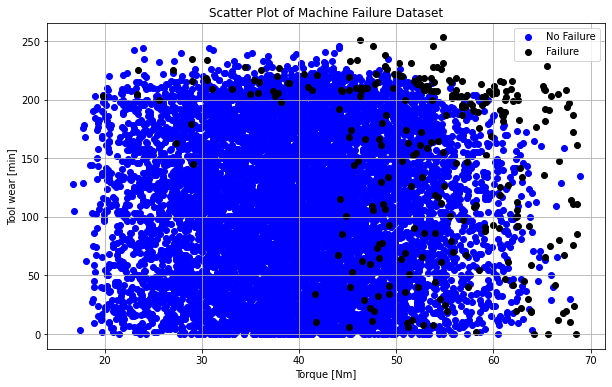

In [33]:

kelas_0 = df[df['Machine failure'] == 0]
kelas_1 = df[df['Machine failure'] == 1]

plt.figure(figsize=(10, 6))
plt.scatter(kelas_0['Torque [Nm]'], kelas_0['Tool wear [min]'], color='blue', label='No Failure')
plt.scatter(kelas_1['Torque [Nm]'], kelas_1['Tool wear [min]'], color='black', label='Failure')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.title('Scatter Plot of Machine Failure Dataset')
plt.legend()
plt.grid(True)
plt.show()


d) [10] Penggunaan Stratified K-Fold cross validation tidak selalu menunjukkan hasil evaluasi yang sesuai dengan konteks dunia nyata. Hal ini disebabkan oleh validation test dataset yang dibuat cenderung seimbang oleh karena tambahan data - data sintetis (oversampling). Pada dunia nyata, biasanya test dataset  lebih cenderung tidak seimbang. Contohnya, pada keseharian kita, email yang masuk pasti lebih banyak email yang tidak spam daripada yang spam. Oleh karena keterbatasan stratified k-fold cross validation dalam meng-handle hal tersebut, kita akan melengkapi method yang menggunakan k-fold cross validation biasa untuk evaluasi modelnya.

Lengkapi method di bawah ini dimana method ini menerima parameter - parameter berikut:

`model`: model yang akan digunakan untuk dilatih dan dievaluasi\
`X`: kumpulan kolom fitur pada dataset yang akan digunakan\
`y`: label/kelas pada dataset\
`resample_method`: metode resample (oversampling/undersampling) yang akan digunakan\
`n_splits`: banyaknya fold yang akan dipakai pada evaluasi menggunakan k-fold cross validation \

In [34]:
def train_and_evaluate_with_oversampling(model, X, y, resample_method, n_splits=5):
    # TODO: Gunakan K-fold biasa dengan fold sebanyak parameter n_splits (Ubah None menjadi jawaban)
    #kf = None
    #ubah jadi berapa n_splits
    X_array = X_df.values
    y_array = y_df.values

    kf = KFold(n_splits=n_splits)
    # TODO: Simpan hasil skor metrik setiap iterasi pada sebuah list
    accuracy_skor = []
    precision_skor = []
    f1_skor = []
    recall_skor = []
    for fold, (train_index, test_index) in enumerate(kf.split(X_array), 1):
        X_train = X_array[train_index]
        y_train = y_array[train_index]
        X_test = X_array[test_index]
        y_test = y_array[test_index]


        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model)

        model_clone.fit(X_train_sampled, y_train_sampled)
        # TODO: Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = model_clone.predict(X_test)

        # TODO: Gunakan metrik makro
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # TODO: Tambahkan hasil skor metrik ke dalam list yang bersesuaian
        accuracy_skor.append(accuracy)
        f1_skor.append(f1)
        precision_skor.append(precision)
        recall_skor.append(recall)

    # TODO: Hitung dan tampilkan mean dari setiap list skor metrik
    mean_accuracy = sum(accuracy_skor) / len(accuracy_skor)
    mean_f1 = sum(f1_skor) / len(f1_skor)
    mean_precision = sum(precision_skor) / len(precision_skor)
    mean_recall = sum(recall_skor) / len(recall_skor)
    # Notes: ganti None dengan nama variabel list masing - masing metrik

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {mean_accuracy}')
    print(f'Mean F1-score (macro): {mean_f1}')
    print(f'Mean Precision (macro): {mean_precision}')
    print(f'Mean Recall (macro): {mean_recall}')

    return mean_accuracy, mean_f1, mean_precision, mean_recall

Jalankan sel di bawah ini untuk mengecek apakah implementasi methodmu sudah benar atau belum. Jika masih terdapat `AssertionError` atau error lainnya, maka implementasi method masih salah

In [35]:
import sys

clf_test = DecisionTreeClassifier()

resample_method = SMOTE()

mean_accuracy, mean_f1, mean_precision, mean_recall = train_and_evaluate_with_oversampling(clf_test, X_df, y_df, resample_method)

expected_mean_accuracy = 0.9115639327559858
expected_mean_f1_score = 0.5904853179472209
expected_mean_precision = 0.579936334077073
expected_mean_recall = 0.7363274113393764

# Tolerance 0.05
assert abs(mean_accuracy - expected_mean_accuracy) <= 0.05, f"Mean Accuracy is not within tolerance: {mean_accuracy}"
assert abs(mean_f1 - expected_mean_f1_score) <= 0.05, f"Mean F1-score is not within tolerance: {mean_f1}"
assert abs(mean_precision - expected_mean_precision) <= 0.05, f"Mean Precision is not within tolerance: {mean_precision}"
assert abs(mean_recall - expected_mean_recall) <= 0.05, f"Mean Recall is not within tolerance: {mean_recall}"

Mean scores across all folds:
Mean Accuracy: 0.9104431991849211
Mean F1-score (macro): 0.5907418886094277
Mean Precision (macro): 0.5783761805454877
Mean Recall (macro): 0.7432474631544453


## 2. OVERSAMPLING [30]

a) [3] Terapkan metode oversampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 1</i></b> : <br>
\<SMOTE\>

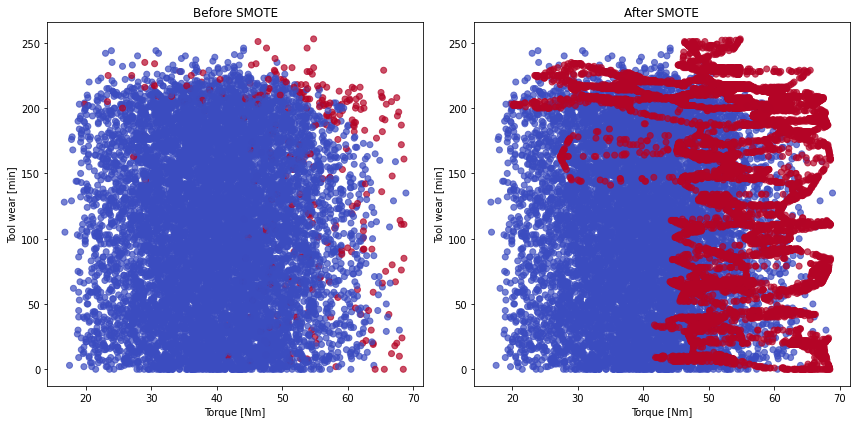

In [36]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

smote = SMOTE()
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_df, y_df)

y_resampled_smote_array = y_resampled_smote.to_numpy().flatten()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df['Machine failure'], cmap='coolwarm', alpha=0.7)
plt.title('Before SMOTE')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_smote.iloc[:, 0], X_resampled_smote.iloc[:, 1], c=y_resampled_smote_array, cmap='coolwarm', alpha=0.7)
plt.title('After SMOTE')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.tight_layout()
plt.show()


b) [3] Terapkan metode oversampling yang lain yang telah dipelajari pada lab
ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 2</i></b> : <br>
\<Insert BorderlineSMOTE\>

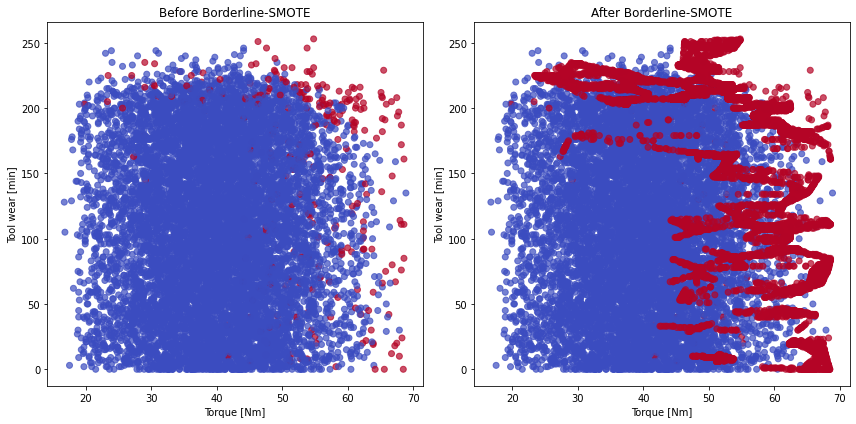

In [37]:
from imblearn.over_sampling import BorderlineSMOTE
import matplotlib.pyplot as plt

borderline_smote = BorderlineSMOTE()
X_resampled_borderline_smote, y_resampled_borderline_smote = borderline_smote.fit_resample(X_df, y_df)
y_resampled_borderline_smote_array = y_resampled_borderline_smote.to_numpy().flatten()
plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df['Machine failure'], cmap='coolwarm', alpha=0.7)
plt.title('Before Borderline-SMOTE')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')


plt.subplot(1, 2, 2)
plt.scatter(X_resampled_borderline_smote.iloc[:, 0], X_resampled_borderline_smote.iloc[:, 1], c=y_resampled_borderline_smote_array, cmap='coolwarm', alpha=0.7)
plt.title('After Borderline-SMOTE')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.tight_layout()
plt.show()


c) [5] Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (2a) dan (2b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi!  

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

Borderline SMOTE merupakan variasi dari SMOTE yang memperhitungkan batas keputusan antara kelas mayoritas dan kelas minoritas yang dilakukan di tahap pembautan sampel sintetis. Yang membedakan antara keduanaya adalh tereletak pada cara kedua metode ini memilki titik-tiitk minoritas yang akan disintesisi. 
Pada smote biasa, smote secara acak memilih titik-titik minoritas untuk disintesisi, tanpa meperhitungkan lokasi yang mana mereka terhadap batas keputusan. Ini membuat pembuatan sampel sintetis di wilayah yang tidak berguna atau tidak relevan. Sedangkan borderline-smote mempertimbangkan sampel minortas yang berada dekat dengan batas keputusan antara kelas mayoritas dan kelas minoritas. Ini bertujuan meningaktkan kualitas sintetisasi dengan memfokuskan pembuatan sampel di sekitar wilayah yang lebih sulit untku dipisahkan. 
Untuk resampling yang difokuskan-> borderline-smote cenderung berfokus pada pembuatan sampel sintetis di wilayah-wialyah yagn lebih penitng dalam meningaktkan kemampuan model dalam membedakan tiap kelas. SMOTE biasa tidak memperhatikan wilayah-wilayah kritis ini dan dapat menghasilkann sampel sintetis di wialyah yang sudah terwakili. 
Dari segi pergoma, karnea borderline-smote menggunakan titik-titik minoritas yang lebih penting, maka ia cendering memberikan hasil yang lebih baik daripada SMOTE biasa dalam meningaktkan kinerja model, terutama dalam kasus yangmana ketimpangan kelas yang signifikan atua ada sejumalh besar norise dalam data. Borderline smote dapat menghaislkan sampel isntetis yang lebih relvean dan berguna untuk meningkatkan kinerja model kalsifikasi pada tatset yang tidak seimbang.
NEXT

d) [7] Buatlah dua buah model decision tree yang menerima dataset pada soal (1a). Lakukan evaluasi model menggunakan cross validation jenis K-fold biasa dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya

Dua model decision tree memiliki kriteria sbb:
- Model pertama menggunakan metode pada soal (2a) untuk oversampling training dataset di setiap iterasi cross validation
- Model kedua menggunakan metode pada soal (2b) untuk oversampling training dataset di setiap iterasi cross validation

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

<details>
<summary>HINT!!</summary>

## Perhatikan soal (1d) :D
# </details>

In [43]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.metrics import f1_score
import numpy as np


k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
f1_macro_scores_smote = []
f1_micro_scores_smote = []
f1_macro_scores_borderline_smote = []
f1_micro_scores_borderline_smote = []


for train_index, test_index in k_fold.split(X_df):
    X_train, X_test = X_df.iloc[train_index], X_df.iloc[test_index]
    y_train, y_test = y_df.iloc[train_index], y_df.iloc[test_index]
    smote = SMOTE()
    X_train_resampled_smote, y_train_resampled_smote = smote.fit_resample(X_train, y_train)
    clf_smote = DecisionTreeClassifier()
    clf_smote.fit(X_train_resampled_smote, y_train_resampled_smote)
    y_pred_smote = clf_smote.predict(X_test)
    f1_macro_smote = f1_score(y_test, y_pred_smote, average='macro')
    f1_micro_smote = f1_score(y_test, y_pred_smote, average='micro')
    f1_macro_scores_smote.append(f1_macro_smote)
    f1_micro_scores_smote.append(f1_micro_smote)
    borderline_smote = BorderlineSMOTE()
    X_train_resampled_borderline_smote, y_train_resampled_borderline_smote = borderline_smote.fit_resample(X_train, y_train)
    clf_borderline_smote = DecisionTreeClassifier()
    clf_borderline_smote.fit(X_train_resampled_borderline_smote, y_train_resampled_borderline_smote)
    y_pred_borderline_smote = clf_borderline_smote.predict(X_test)
    f1_macro_borderline_smote = f1_score(y_test, y_pred_borderline_smote, average='macro')
    f1_micro_borderline_smote = f1_score(y_test, y_pred_borderline_smote, average='micro')
    f1_macro_scores_borderline_smote.append(f1_macro_borderline_smote)
    f1_micro_scores_borderline_smote.append(f1_micro_borderline_smote)

mean_f1_macro_smote = np.mean(f1_macro_scores_smote)
mean_f1_micro_smote = np.mean(f1_micro_scores_smote)
mean_f1_macro_borderline_smote = np.mean(f1_macro_scores_borderline_smote)
mean_f1_micro_borderline_smote = np.mean(f1_micro_scores_borderline_smote)
print("Rata-rata f1 macro Model Pertama (SMOTE):", mean_f1_macro_smote)
print("Rata-rata f1 micro Model Pertama (SMOTE):", mean_f1_micro_smote)
print("Rata-rata f1 macro Model Kedua (Borderline SMOTE):", mean_f1_macro_borderline_smote)
print("Rata-rata f1 micro Model Kedua (Borderline SMOTE):", mean_f1_micro_borderline_smote)


Rata-rata f1 macro Model Pertama (SMOTE): 0.5701140400810746
Rata-rata f1 micro Model Pertama (SMOTE): 0.8787570045848192
Rata-rata f1 macro Model Kedua (Borderline SMOTE): 0.6142318460403107
Rata-rata f1 micro Model Kedua (Borderline SMOTE): 0.9207335710646969


e) [4] Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan!

> <b><i>Jawaban</i></b> : <br>
Dari hasil masing-masing score, model kedua yang menggunakan borderline smote memberikan skor F1 macro tertinggi dibandingkan dengan model pertama yang menggunakan SMOTE biasa. Skor F1 macro model kedua dengan borderline smote adalah 0.6184, dan F1 score macro model Pertama (SMOTE) adalah 0.5665.
Skor F1 macro yang meningkat pada model kedua dengan borderline smote dapat disebabkan karena cara borderline smote dalam menghasilkan data sintetis yang lebih fokus pada sampel yang berada di sekitar batas keputusan (borderline) antara kelas mayoritas dan kelas minoritas. Mempertahankan dan menghasilkan data sintetis di sekitar wilayah dapat membuat borderline smote cenderung menghasilkan data sintetis yang lebih representatif dan relevan dalam meningkatkan kinerja model di kelas minoritas.


f) [3] Buatlah sebuah model decision tree yang menerima dataset dari model dengan skor f1 makro tertinggi di soal (2d). Misalnya, jika model pertama memiliki skor tertinggi, maka dataset (X dan y) yang dipakai diambil dari soal (2a). Namun, jika model kedua memiliki skor tertinggi, maka dataset (X dan y) yang dipakai dimabil dari soal (2b). Setelah itu, lakukan evaluasi model menggunakan cross validation jenis **Stratified k-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya.


In [47]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


decision_tree_model = DecisionTreeClassifier()
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['f1_macro', 'f1_micro']
cv_results = cross_validate(decision_tree_model, X_resampled_borderline_smote, y_resampled_borderline_smote_array, cv=stratified_k_fold, scoring=scoring)
mean_scores = {score: cv_results[f"test_{score}"].mean() for score in scoring}
print("Rata-rata f1 macro:", mean_scores['f1_macro'])
print("Rata-rata f1 micro:", mean_scores['f1_micro'])


Rata-rata f1 macro: 0.9339888960079504
Rata-rata f1 micro: 0.9339911280181659


In [ ]:
#

g) [5] Skor f1 manakah yang lebih tinggi antara evaluasi model terbaik di soal (2d) atau (2f) secara makro maupun mikro? Berikan penjelasan jawaban Anda untuk kedua metrik makro dan mikro!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini

Ada perbedaan dari cross validationnya. Pada soal 2d, saya hanya menggunanka K-fold biasa, dan dataset dibagi sesuai dengan jumlah fold ynga sudah saya difinisikan dan model dilatih sebanyak K kali. Tiap kali penggunaan fold sebagai datai validasi, sisa fold lainnya digunakan sebagai data pelatihan. Namun, pembagian ini tidak memperhitungkan distribusi kelas target. 
Di sisi lain, pada kasus 2f, saya menggunakan stratified k-fold, yang maan setiap fold memiliki proposi yang seimbang dari setiap kelas target. Hla ini penting ketika dataset memiliki distribusi kelas yang tidak seimbang. Hal ini membuat setiap kelas mempunyai representasi yang sam adalam proses validasi. Pada kasusu oversampling, kelas minoritas dihasilkan kemabli untuk menyeimbangkan distirbusi, petinng utnuk memastikan bahwa kelas minrotias tetap mewakili dalam proses validasi. 
Selain itu, bisa jaa pembagian dataset ke dalam folda paat memenagruhi hasi evasilsi molde dalam konteks variasi yang terjadi secara kebeutlan. 

next

## 3. UNDERSAMPLING [20]

a) [3] Terapkan metode undersampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 1</i></b> : <br>
\<Insert Random Undersampling\>

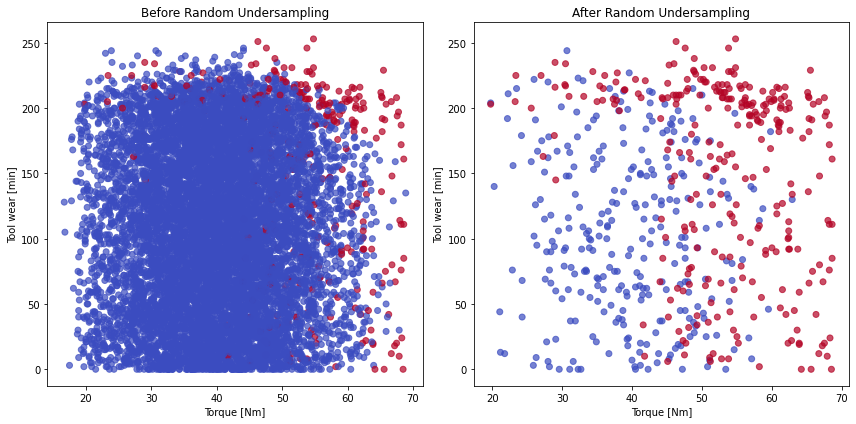

In [55]:
# Mengimport library yang diperlukan
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


random_undersampler = RandomUnderSampler()
X_resampled_random, y_resampled_random = random_undersampler.fit_resample(X_df, y_df)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df['Machine failure'], cmap='coolwarm', alpha=0.7)
plt.title('Before Random Undersampling')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_random.iloc[:, 0], X_resampled_random.iloc[:, 1], c=y_resampled_random['Machine failure'], cmap='coolwarm', alpha=0.7)
plt.title('After Random Undersampling')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.tight_layout()
plt.show()


b) [3] Terapkan metode undersampling yang lain yang telah dipelajari pada lab
ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

> <b><i>Metode 2</i></b> : <br>
\<Insert Near Miss\>

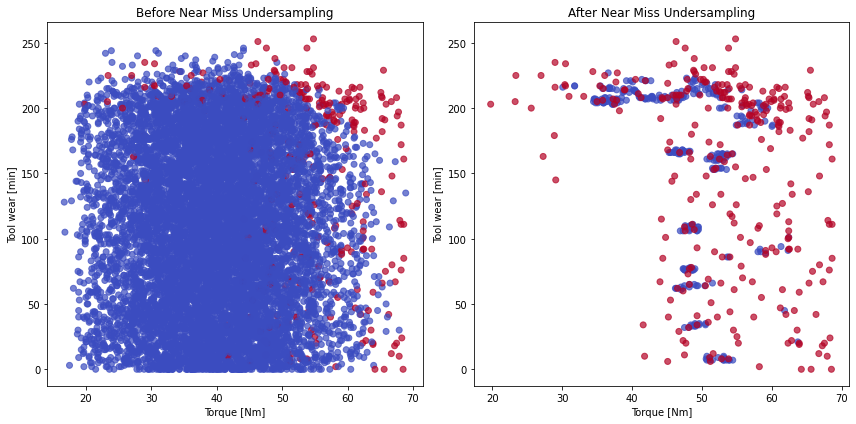

In [56]:
# Mengimport library yang diperlukan
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt


near_miss_undersampler = NearMiss()
X_resampled_near_miss, y_resampled_near_miss = near_miss_undersampler.fit_resample(X_df, y_df)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_df.iloc[:, 0], X_df.iloc[:, 1], c=y_df['Machine failure'], cmap='coolwarm', alpha=0.7)
plt.title('Before Near Miss Undersampling')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.subplot(1, 2, 2)
plt.scatter(X_resampled_near_miss.iloc[:, 0], X_resampled_near_miss.iloc[:, 1], c=y_resampled_near_miss['Machine failure'], cmap='coolwarm', alpha=0.7)
plt.title('After Near Miss Undersampling')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')

plt.tight_layout()
plt.show()


c) [5] Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (2a) dan (2b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi!

> <b><i>Jawaban</i></b> : <br>

Dari hasil visualisasi scatter plot pada kedua dataset hasil resampling tersebut terdapat perbedaan yang terletak pada distribusi kelas dan struktur data.
Pada distribusi kelas, harus dari resampling dengan metode Random Undersampling, memiliki kelas minoritas (klasifikasi kegagalan mesin) yang memiliki jumlah yang seimbang dengan kelas mayoritas. Hal ini terjadi karena metode Random Undersampling secara acak menghapus sampel dari kelas mayoritas hingga  Sedangkan pada dataset hasil resampling dengan metode Near Miss Undersampling, kelas minoritas menjadi lebih dominan banyaknya. Hal ini disebabkan karena metode ini memilih sampel -sampel dari kelas mayoritas yang paling dekat dengan kelas minoritas, sehingga proporsi kelas bisa saja menjadi tidak seimbang seperti pada Random Undersampling. Dari segi strutkur data, metode Random Undersampling dapat memungkikan kehilanagn beberapa informasi dari kelas mayoritas karena penghapusan sampel secara acak. Tetapi, pada near miss undersampling, data dapat menjadi lebih terfokus pada swalayan yang dekat dengan kelas minoritas, sehingga membuat struktur data menjadi lebih padat di sekitar wilayah tersebut.

d) [4] Buatlah dua buah model decision tree yang menerima dataset pada soal (2a) dan (2b) berturut - turut. Lakukan evaluasi model menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya

In [59]:
#mungkin maksudnya adalah membuat dua buah model decision tree yang nerima dataset pad soal undersampling dari soal (2a) dan (2b)
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import numpy as np

decision_tree_model_a = DecisionTreeClassifier()
decision_tree_model_b = DecisionTreeClassifier()
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model untuk dataset 2a
scores_a_macro = cross_val_score(decision_tree_model_a, X_resampled_random, y_resampled_random, cv=stratified_k_fold, scoring='f1_macro')
scores_a_micro = cross_val_score(decision_tree_model_a, X_resampled_random, y_resampled_random, cv=stratified_k_fold, scoring='f1_micro')

# Evaluasi model untuk dataset 2b
scores_b_macro = cross_val_score(decision_tree_model_b, X_resampled_near_miss, y_resampled_near_miss, cv=stratified_k_fold, scoring='f1_macro')
scores_b_micro = cross_val_score(decision_tree_model_b, X_resampled_near_miss, y_resampled_near_miss, cv=stratified_k_fold, scoring='f1_micro')

# Menghitung rata-rata metriks evaluasi
mean_scores_a_macro = np.mean(scores_a_macro)
mean_scores_a_micro = np.mean(scores_a_micro)
mean_scores_b_macro = np.mean(scores_b_macro)
mean_scores_b_micro = np.mean(scores_b_micro)

# Menampilkan hasil rata-rata metriks evaluasi
print("Rata-rata f1 macro Model untuk Dataset 2a (resample_random):", mean_scores_a_macro)
print("Rata-rata f1 micro Model untuk Dataset 2a (resample_random):", mean_scores_a_micro)
print("Rata-rata f1 macro Model untuk Dataset 2b (resample_near_miss):", mean_scores_b_macro)
print("Rata-rata f1 micro Model untuk Dataset 2b (resample_near_miss):", mean_scores_b_micro)


Rata-rata f1 macro Model untuk Dataset 2a (resample_random): 0.7824925230694472
Rata-rata f1 micro Model untuk Dataset 2a (resample_random): 0.7796338672768879
Rata-rata f1 macro Model untuk Dataset 2b (resample_near_miss): 0.6823052176462502
Rata-rata f1 micro Model untuk Dataset 2b (resample_near_miss): 0.694187643020595


e) [5] Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan!

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini


Dari hasil evaluasi, metode yang memberikan skor F1 makro tertinggi adalah metode Random Undersampling (Dataset 2a), dengan rata-rata skor sebesar 0.7825. Sedangkan metode Near Miss Undersampling (Dataset 2b) memiliki rata-rata skor F1 makro sebesar 0.6823.

Perbedaan ini menunjukkan bahwa penggunaan Random Undersampling menghasilkan model decision tree yang lebih baik dalam mengklasifikasikan dataset yang telah diundersample. Hal ini mungkin disebabkan oleh karakteristik dari masing-masing metode undersampling. Random Undersampling secara acak menghapus beberapa sampel dari kelas mayoritas, sehingga dapat mengurangi ketidakseimbangan kelas tanpa kehilangan informasi penting dari dataset. Sementara itu, Near Miss Undersampling memilih sampel-sampel kelas mayoritas yang berdekatan dengan kelas minoritas, yang mungkin dapat menghilangkan sebagian besar variasi dan informasi dari kelas mayoritas.

Dengan demikian, dalam konteks dataset ini, Random Undersampling lebih efektif dalam meningkatkan keseimbangan kelas dan mempertahankan kualitas informasi dari dataset dibandingkan dengan Near Miss Undersampling.


## 4. COST-SENSITIVE LEARNING [15]

a) [3] Buatlah sebuah model decision tree yang menerima dataset soal (1a). Lakukan evaluasi model menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [61]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import numpy as np

from sklearn.model_selection import cross_validate


decision_tree_model = DecisionTreeClassifier()
X = X_df
y = y_df.values.ravel()  # Mengubah target menjadi array 1 dimensi
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['f1_macro', 'f1_micro']
cv_results = cross_validate(decision_tree_model, X, y, cv=stratified_k_fold, scoring=scoring)

mean_f1_macro = cv_results['test_f1_macro'].mean()
mean_f1_micro = cv_results['test_f1_micro'].mean()

print("Mean f1 macro score:", mean_f1_macro)
print("Mean f1 micro score:", mean_f1_micro)



Mean f1 macro score: 0.6801671036322496
Mean f1 micro score: 0.9635252165053491


b) [5] Apakah ada perbedaan terhadap skor f1 makro dan mikronya? Jelaskan!

> <b><i>Jawaban</i></b> : <br>

Terdapat perbedaan terhadpa skor f1 makro dan mikro. Pada kasus ini, nilai f1 macro bernilai 0.68016. Skor macro memberikan bobtoyang sama pada setipa kelas, sednagka f1 micro memberikan bobot yang sama pada setipa smaple, tanpa mempertihungkan kelasnya. Hal ini membuat f1 micro lebih dipengaruhi oleh kelas mayoritas. Dalam hal disitbrusi kelas, F1 macro tidak dipenagruhi oleh distribusi kelas, semsntera f1 micor sangat dipengaruh oleh distirbutis ini. Jaid ketika distirbusi tidak seimbang, f1 micro akan cendeung dipengarihi oleh kelas mayoirtas. 

next

c) [3] Buatlah sebuah model decision tree dengan pembobotan yang menerima dataset soal (1a). Gunakan bobot (weight) sebesar 2:1 untuk perbandingan kelas mayoritas dan minoritas. Lakukan evaluasi model menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metriks evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriksnya

In [68]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.tree import DecisionTreeClassifier
import numpy as np

X = X_df.values
y = y_df.values.ravel()

class_weights = {0: 2, 1: 1}
decision_tree_model_weighted = DecisionTreeClassifier(class_weight=class_weights)

stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_macro', 'f1_micro']
cv_results_weighted = cross_validate(decision_tree_model_weighted, X, y, cv=stratified_k_fold, scoring=scoring)
mean_f1_macro_weighted = np.mean(cv_results_weighted['test_f1_macro'])
mean_f1_micro_weighted = np.mean(cv_results_weighted['test_f1_micro'])
print("Mean f1 macro score (weighted):", mean_f1_macro_weighted)
print("Mean f1 micro score (weighted):", mean_f1_micro_weighted)


Mean f1 macro score (weighted): 0.6844283785042202
Mean f1 micro score (weighted): 0.9636271013754458


d) [5] Bagaimana perbedaan skor f1 mikro pada model nomor soal (4a) dan (4c) di atas? Jelaskan hubungan skor f1 makro dengan bobot yang diberikan pada model yang lebih besar pada kelas mayoritas!

> <b><i>Jawaban</i></b> : <br>



Perbedaan antara skor f1 mikro pada model nomor (4a) dan (4c) dapat disebabkan oleh penggunaan pembobotan kelas yang berbeda. Pada model (4a), tidak ada pembobotan yang diberikan, sehingga setiap kelas dianggap memiliki bobot yang sama. Namun, pada model (4c), kita memberikan bobot yang lebih tinggi pada kelas mayoritas (kelas 0) dibandingkan dengan kelas minoritas (kelas 1).


Pemberian bobot ini akan berdampak pada perhitungan skor f1 mikro, model akan lebih cenderung untuk memperkirakan dengan benar instansi kelas mayoritas, yang kemudian ini meningkatkan skor f1 mikro secara keseluruhan.
Tetapi dalam konteks kompleksitas model, perbedaan skor yang antara penggunaan bobot dan tidak menggunakan bobto yang tidak jauh beda, bisa berarti bahwa model decision tree terlalu sederhana sehingga tidak cukup menangkap pola-pola dalam data bahkan setelah pembobotan kelas diberikan. Hal ini membuat pembobotan kelas  tidak memberikan dampak yang signifikan.





## 5. NEURAL NETWORK WITH PIPELINE [25]

a) [3] Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 30, dan 10 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.001
- Menggunakan stochastic gradient descent sebagai algoritma pencari nilai weight dan bias

In [70]:
mlp_classifier_1 = MLPClassifier(
    alpha= 0.001,
    hidden_layer_sizes=(50,30,10),
    solver='sgd',
    random_state=42,
    activation='relu'
)

b) [3] Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 50 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.01
- Menggunakan adam sebagai algoritma pencari nilai weight dan bias

In [71]:
mlp_classifier_2 = MLPClassifier(
    alpha= 0.01,
    hidden_layer_sizes=(100,50),
    solver='adam',
    random_state=42,
    activation='relu'
)

c) [4] Evaluasi kedua model tersebut memakai dataset soal (1a) dengan menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [74]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

X = X_df.values
y = y_df.values.ravel()
scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scores_1 = cross_validate(mlp_classifier_1, X, y, cv=stratified_k_fold, scoring=scoring)
mean_scores_1 = {metric: np.mean(scores) for metric, scores in scores_1.items()}
scores_2 = cross_validate(mlp_classifier_2, X, y, cv=stratified_k_fold, scoring=scoring)
mean_scores_2 = {metric: np.mean(scores) for metric, scores in scores_2.items()}
print("Model 1 (50-30-10):")
print("Mean f1 macro score:", mean_scores_1['test_f1_macro'])
print("Mean f1 micro score:", mean_scores_1['test_f1_micro'])
print("\nModel 2 (100-50):")
print("Mean f1 macro score:", mean_scores_2['test_f1_macro'])
print("Mean f1 micro score:", mean_scores_2['test_f1_micro'])


c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model 1 (50-30-10):
Mean f1 macro score: 0.4926075214569819
Mean f1 micro score: 0.9708609271523179

Model 2 (100-50):
Mean f1 macro score: 0.5617106337524255
Mean f1 micro score: 0.9727967396841569


d) [4] Apakah terdapat perbedaan skor metrik makro evaluasi model pada soal (4c)? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!  

> <b><i>Jawaban</i></b> : <br>
Jawaban di sini, hapus tulisan ini
Ya, da perbedaan dalam skor metrik makro evaluasi model antara model pertama (50,30,10) dan model kedua (100,50). Perbedaan performa ini karna model kedua mempunyai lebih bayak enuron dalam tiap layer dibandingkan denagn mdoel pertama. Model kedua juga mempunyai kapisitas lebih banyak dalam mempelajari pola-pola yang kompleks dalam data. Ini meningkatkan kemampuan model dalam mengklasifikasikan data dengan lebih baik. Hal ini terlihat pada peningaktana skor metrik makro. 
Penggunaan hyperpatameter yang berbeda apda kedua model juga dapat memengaruhi kinerja tiap model. Pada learing rrrrate yang lebih tinggi pad amodel kedua (0.01) ini membuat model untuk konvergen lebih cepat selama proses trianing, dan dapat mempercepat pembelajaran pola-pola dalam data. Selain itu, penggunaan algoritam pencarian paramter berbeda (stochastic gradient descent) pada mdoel pertama dan adamm pada model kedua dapa temengaruhi cara model memperbarui bobot selama pelatihan, yang dapat memengaruhi kinerja model. Meskipun kedua model mempunyai skor metrik makro yang lebih tinggi, tetapi model yang lebih komplek berpotnesi untuk mengalami overfitting terhadpa data pelatihan. 
next

e) [3] Dengan menggunakan Pipeline, evaluasi sebuah model menggunakan cross validation dengan jenis **Stratified K-fold** yang melakukan oversampling dataset memakai metode SVMSMOTE terlebih dahulu sebelum dataset masuk ke model MLPClassifier. Gunakan model MLPClassifier yang memiliki skor f1 makro tertinggi dari soal (4a) dan (4b)

In [79]:
# Buat Pipeline
# Step 1: Oversampling menggunakan SVMSMOTE
# Step 2: Model MLPClassifier
pipeline = Pipeline([
    ('oversampling', SVMSMOTE(random_state=42)),  # Langkah pertama: oversampling
    ('mlp_classifier', mlp_classifier_2)  # Langkah kedua: model MLPClassifier
])


stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}
scores_pipeline = cross_validate(pipeline, X, y, cv=stratified_k_fold, scoring=scoring)
mean_scores_pipeline = {metric: scores.mean() for metric, scores in scores_pipeline.items()}
print("Mean f1 macro score (Pipeline):", mean_scores_pipeline['test_f1_macro'])
print("Mean f1 micro score (Pipeline):", mean_scores_pipeline['test_f1_micro'])


Mean f1 macro score (Pipeline): 0.5763642265257176
Mean f1 micro score (Pipeline): 0.8541008660213958


f) [3] Dengan menggunakan Pipeline, evaluasi sebuah model yang melakukan undersampling dataset menggunakan Random undersampling terlebih dahulu sebelum dataset masuk ke model MLPClassifier. Gunakan model MLPClassifier yang memiliki skor f1 makro tertinggi dari soal (4a) dan (4b)

In [81]:

pipeline = Pipeline([
    ('undersampling', RandomUnderSampler(random_state=42)),  # Langkah pertama: undersampling
    ('mlp_classifier', mlp_classifier_2)  # Langkah kedua: model MLPClassifier
])


stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}
scores_pipeline = cross_validate(pipeline, X, y, cv=stratified_k_fold, scoring=scoring)
mean_scores_pipeline = {metric: scores.mean() for metric, scores in scores_pipeline.items()}
print("Mean f1 macro score (Pipeline):", mean_scores_pipeline['test_f1_macro'])
print("Mean f1 micro score (Pipeline):", mean_scores_pipeline['test_f1_micro'])


Mean f1 macro score (Pipeline): 0.4298837856037844
Mean f1 micro score (Pipeline): 0.6250636780438106


g) [5] Berdasarkan skor metrik evaluasi model pada soal (4e) dan (4f), jelaskan pengaruh pemilihan metode resampling antara oversampling atau undersampling terhadap model MLPClassifier! Apakah pemilihan tersebut juga berpengaruh kepada model - model klasifikasi lainnya?  

> <b><i>Jawaban</i></b> : <br>



Oversampling dengan SVMSMOTE menghasilkan skor lebih tinggi untuk kedua matrik evaluasi, baik dari f1 macro dan f1 micro, dibandingkan dengan undersampling. Dengan SVMSOTE peningkatan jumlah sampel dalam kelas minoritas dengan cara lebih cerdas, yakni dengan memperhatikan struktur dan informasi dari data asli. Model yang dilatih dengan dataset yang telah di-oversample memiliki kemampuan lebih baik dalam mengklasifikasikan kelas minoritas yang tercermin dalam meningkatkan skor evaluasi.


Sedangkan rendahnya skor dievaluasi f1 macro dan f1 micro pada kasus undersampling seperti nya karena undersampling dapat menyebabkan pengurangan jumlah sampel dalam kelas mayroitas, yang menyebabaknakehilanagn informasi penting dari data asli, sehingga mempengaruhi kemampuan model untuk mempelajari pola-pola yang kompleks dalam dataset.
Model ini dilatih dengan dataset yang telah di-undersample memiliki kemungkinan untuk mengalami kesulitan dalam memahami distribusi data secara menyeluruh yang dapat mengakibatkan kinerja yang lebih rendah mengklasifikasikan kedua kelas.


Pengaruh pemilihan metode resampling tidak hanya berlaku untuk MLPCLassifier, namun dapat berpengaruh pada model klasifikasi lainnya. Setiap model memiliki karakteristik sendiri dan resampling dapat memengaruhi cara model tersebut mempelajari dan memahami data. Misalnya, model yang lebih kompleks lebih mampu memanfaatkan informasi tambahan dari data yang telah di-oversample, semsntara mode l yang lebih sederhana bisa saja lebih rentang terhadap kehilangan informasi akibat undersampling.





# KAGGLE COMPETITION

Dalam rangka menerapkan pemahaman kalian pada materi imbalance classification dan neural network, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 7 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Imbalance Classification Dan Neural Network](https://www.kaggle.com/t/a92310381f584afcbf4bdc69e60da6cb)

In [123]:
# Lakukan pengerjaan kaggle competition di sini

df = pd.read_csv('car_claim_fraud_training.csv')
df.head()

,claim_number,age_of_driver,safty_rating,annual_income,living_status,vehicle_category,vehicle_price,fraud
0,15474,55,82,40065,Rent,Large,46191.49970,1
1,20972,29,34,33670,Rent,Large,18166.25089,0
2,27000,33,93,34974,Own,Large,16125.05635,0
3,27275,51,77,39310,Own,Medium,28518.94641,0
4,18966,42,47,37384,Own,Medium,12509.03330,0


In [122]:

df_test = pd.read_csv('car_claim_fraud_test.csv')
df_test.head()

,claim_number,age_of_driver,safty_rating,annual_income,living_status,vehicle_category,vehicle_price
0,8425,32,72,34648,Own,Medium,23342.38234
1,16925,54,78,39879,Own,Large,11143.39974
2,14484,46,64,38280,Rent,Large,14540.32423
3,6428,43,71,37626,Rent,Medium,26189.97416
4,14903,57,57,40461,Own,Large,18808.00665


In [100]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd

# Load dataset
train_data = pd.read_csv("car_claim_fraud_training.csv")

y_train = train_data['fraud']
X_train = train_data[['age_of_driver', 'safty_rating','annual_income']]
# Definisikan metrik evaluasi sebagai f1 macro dan f1 micro
scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}

sampling_methods = [SMOTE(random_state=42), BorderlineSMOTE(random_state=42), SVMSMOTE(random_state=42), ADASYN(random_state=42)]


param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 30, 10)],
    'mlpclassifier__learning_rate_init': [0.001, 0.01]
}


for method in sampling_methods:
    pipeline = make_pipeline(method, MLPClassifier(random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), refit='f1_macro')

    grid_search.fit(X_train, y_train)

    print(f"Oversampling method: {method.__class__.__name__}, Classifier: MLP Classifier")
    print("Best parameters:", grid_search.best_params_)
    print("Best f1 macro score:", grid_search.best_score_)
    print("Best f1 micro score:", grid_search.cv_results_['mean_test_f1_micro'][grid_search.best_index_])
    print()


Oversampling method: SMOTE, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate_init': 0.001}
Best f1 macro score: 0.4590418758442363
Best f1 micro score: 0.7851892946347112

Oversampling method: BorderlineSMOTE, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate_init': 0.01}
Best f1 macro score: 0.4262623387590951
Best f1 micro score: 0.6208001034128373

Oversampling method: SVMSMOTE, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (50,), 'mlpclassifier__learning_rate_init': 0.01}
Best f1 macro score: 0.4939891809038528
Best f1 micro score: 0.6951280588513056

Oversampling method: ADASYN, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (50, 30, 10), 'mlpclassifier__learning_rate_init': 0.01}
Best f1 macro score: 0.4575562020909215
Best f1 micro score: 0.8435089642264227



In [ ]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd

# Load dataset
train_data = pd.read_csv("car_claim_fraud_training.csv")

# Pisahkan fitur (X) dan target (y)
# X_train = train_data.drop(columns=['claim_number', 'fraud'])
y_train = train_data['fraud']
X_train = train_data[['age_of_driver', 'safty_rating','annual_income']]
# Definisikan metrik evaluasi sebagai f1 macro dan f1 micro
scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}

# Definisikan metode oversampling yang akan digunakan
sampling_methods = [SMOTE(random_state=42), BorderlineSMOTE(random_state=42), SVMSMOTE(random_state=42), ADASYN(random_state=42)]

# Definisikan grid parameter untuk hyperparameter tuning hanya untuk MLP Classifier
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 30, 10)],
    'mlpclassifier__learning_rate_init': [0.001, 0.01]
}

# Buat pipeline dan evaluasi untuk setiap kombinasi metode oversampling dan model MLP Classifier
for method in sampling_methods:
    # Buat pipeline dengan metode oversampling dan model MLP Classifier
    pipeline = make_pipeline(method, MLPClassifier(random_state=42))
    
    # Definisikan GridSearchCV untuk hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), refit='f1_macro')
    
    # Lakukan hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Tampilkan hasil terbaik dari hyperparameter tuning
    print(f"Oversampling method: {method.__class__.__name__}, Classifier: MLP Classifier")
    print("Best parameters:", grid_search.best_params_)
    print("Best f1 macro score:", grid_search.best_score_)
    print("Best f1 micro score:", grid_search.cv_results_['mean_test_f1_micro'][grid_search.best_index_])
    print()


In [99]:
df.corr()


,claim_number,age_of_driver,safty_rating,annual_income,vehicle_price,fraud
claim_number,1.000000,-0.003276,0.007198,0.002227,-0.000595,0.008727
age_of_driver,-0.003276,1.000000,-0.015363,0.907671,-0.014689,-0.059923
safty_rating,0.007198,-0.015363,1.000000,-0.005525,-0.008188,-0.049758
annual_income,0.002227,0.907671,-0.005525,1.000000,-0.013593,-0.046013
vehicle_price,-0.000595,-0.014689,-0.008188,-0.013593,1.000000,0.003778
fraud,0.008727,-0.059923,-0.049758,-0.046013,0.003778,1.000000


In [101]:
from sklearn.tree import DecisionTreeClassifier

# Definisikan grid parameter untuk hyperparameter tuning hanya untuk Decision Tree Classifier
param_grid_dt = {
    'decisiontreeclassifier__max_depth': [None, 5, 10],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10]
}

# Buat pipeline dan evaluasi untuk setiap kombinasi metode oversampling dan model Decision Tree Classifier
for method in sampling_methods:
    # Buat pipeline dengan metode oversampling dan model Decision Tree Classifier
    pipeline_dt = make_pipeline(method, DecisionTreeClassifier(random_state=42))
    
    # Definisikan GridSearchCV untuk hyperparameter tuning
    grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), refit='f1_macro')
    
    # Lakukan hyperparameter tuning
    grid_search_dt.fit(X_train, y_train)
    
    # Tampilkan hasil terbaik dari hyperparameter tuning
    print(f"Oversampling method: {method.__class__.__name__}, Classifier: Decision Tree Classifier")
    print("Best parameters:", grid_search_dt.best_params_)
    print("Best f1 macro score:", grid_search_dt.best_score_)
    print("Best f1 micro score:", grid_search_dt.cv_results_['mean_test_f1_micro'][grid_search_dt.best_index_])
    print()


Oversampling method: SMOTE, Classifier: Decision Tree Classifier
Best parameters: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 5}
Best f1 macro score: 0.49887603764237304
Best f1 micro score: 0.6545302514598517

Oversampling method: BorderlineSMOTE, Classifier: Decision Tree Classifier
Best parameters: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 10}
Best f1 macro score: 0.501459230365007
Best f1 micro score: 0.6613284703660259

Oversampling method: SVMSMOTE, Classifier: Decision Tree Classifier
Best parameters: {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_split': 5}
Best f1 macro score: 0.5213524755012758
Best f1 micro score: 0.725391077865166

Oversampling method: ADASYN, Classifier: Decision Tree Classifier
Best parameters: {'decisiontreeclassifier__max_depth': 5, 'decisiontreeclassifier__min_samples_split': 2}
Best f1 macro score: 0.49411921233649514
Best f1 mic

In [102]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

# Definisi metode undersampling yang akan digunakan
undersampling_methods = [RandomUnderSampler(random_state=42), NearMiss(), TomekLinks()]

# Buat pipeline dan evaluasi untuk setiap kombinasi metode undersampling dan model MLP Classifier
for method in undersampling_methods:
    # Buat pipeline dengan metode undersampling dan model MLP Classifier
    pipeline = make_pipeline(method, MLPClassifier(random_state=42))
    
    # Definisikan GridSearchCV untuk hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), refit='f1_macro')
    
    # Lakukan hyperparameter tuning
    grid_search.fit(X_train, y_train)
    
    # Tampilkan hasil terbaik dari hyperparameter tuning
    print(f"Undersampling method: {method.__class__.__name__}, Classifier: MLP Classifier")
    print("Best parameters:", grid_search.best_params_)
    print("Best f1 macro score:", grid_search.best_score_)
    print("Best f1 micro score:", grid_search.cv_results_['mean_test_f1_micro'][grid_search.best_index_])
    print()


Undersampling method: RandomUnderSampler, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (50, 30, 10), 'mlpclassifier__learning_rate_init': 0.001}
Best f1 macro score: 0.3289887235327827
Best f1 micro score: 0.5687582126672179

Undersampling method: NearMiss, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (50, 30, 10), 'mlpclassifier__learning_rate_init': 0.01}
Best f1 macro score: 0.46281189802197853
Best f1 micro score: 0.8399141288857267

Undersampling method: TomekLinks, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate_init': 0.01}
Best f1 macro score: 0.45792877542456517
Best f1 micro score: 0.8433782452721743



In [103]:
# Oversampling method: SVMSMOTE, Classifier: Decision Tree Classifier
# Best parameters: {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_split': 5}
# Best f1 macro score: 0.5213524755012758
# Best f1 micro score: 0.725391077865166

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SVMSMOTE
import pandas as pd

# Load dataset test
test_data = pd.read_csv("car_claim_fraud_test.csv")

# Pisahkan fitur (X_test)
X_test = test_data[['age_of_driver', 'safty_rating','annual_income']]

# Transformasi oversampling menggunakan SVMSMOTE
svmsmote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svmsmote.fit_resample(X_train, y_train)

# Buat dan latih model Decision Tree Classifier dengan parameter terbaik
best_dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
best_dt_model.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data uji
predictions = best_dt_model.predict(X_test)

# Tampilkan hasil prediksi
print(predictions)


[0 0 1 ... 0 0 0]


In [104]:
import pandas as pd

# Load dataset test
test_data = pd.read_csv("car_claim_fraud_test.csv")

# Pisahkan fitur (X_test)
X_test = test_data[['age_of_driver', 'safty_rating','annual_income']]

# Transformasi oversampling menggunakan SVMSMOTE
svmsmote = SVMSMOTE(random_state=42)
X_resampled, y_resampled = svmsmote.fit_resample(X_train, y_train)

# Buat dan latih model Decision Tree Classifier dengan parameter terbaik
best_dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
best_dt_model.fit(X_resampled, y_resampled)

# Lakukan prediksi pada data uji
predictions = best_dt_model.predict(X_test)

# Buat dataframe hasil prediksi
result_df = pd.DataFrame({'claim_number': test_data['claim_number'], 'fraud_prediction': predictions})

# Simpan dataframe ke dalam file CSV
result_df.to_csv('hasil_prediksi_fraud.csv', index=False)


In [ ]:
#scorenya : 0.79098

predict kedua 

In [105]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, make_scorer
import pandas as pd

# Load dataset test
test_data = pd.read_csv("car_claim_fraud_test.csv")

# Pisahkan fitur (X_test)
X_test = test_data[['age_of_driver', 'safty_rating','annual_income']]

# Definisikan metrik evaluasi sebagai f1 macro dan f1 micro
scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}

# Definisikan metode undersampling yang akan digunakan
undersampling_method = TomekLinks()

# Definisikan grid parameter untuk hyperparameter tuning hanya untuk MLP Classifier
param_grid = {
    'mlpclassifier__hidden_layer_sizes': [(100,)],
    'mlpclassifier__learning_rate_init': [0.01]
}

# Buat pipeline dengan metode undersampling dan model MLP Classifier
pipeline = make_pipeline(undersampling_method, MLPClassifier(random_state=42))

# Definisikan GridSearchCV untuk hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), refit='f1_macro')

# Lakukan hyperparameter tuning
grid_search.fit(X_train, y_train)

# Lakukan prediksi pada data uji
predictions = grid_search.predict(X_test)

# Tampilkan hasil terbaik dari hyperparameter tuning
print(f"Undersampling method: {undersampling_method.__class__.__name__}, Classifier: MLP Classifier")
print("Best parameters:", grid_search.best_params_)
print("Best f1 macro score:", grid_search.best_score_)
print("Best f1 micro score:", grid_search.cv_results_['mean_test_f1_micro'][grid_search.best_index_])
print()

# Buat dataframe hasil prediksi
result_df = pd.DataFrame({'claim_number': test_data['claim_number'], 'fraud_prediction': predictions})

# Simpan dataframe ke dalam file CSV
result_df.to_csv('hasil_prediksi_fraud_tomeklinks.csv', index=False)


Undersampling method: TomekLinks, Classifier: MLP Classifier
Best parameters: {'mlpclassifier__hidden_layer_sizes': (100,), 'mlpclassifier__learning_rate_init': 0.01}
Best f1 macro score: 0.45792877542456517
Best f1 micro score: 0.8433782452721743



In [ ]:
#score nya 0.79070

pakai model di submisison pertama tetapi dikurangi fiturnya 

In [107]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load dataset test
test_data = pd.read_csv("car_claim_fraud_test.csv")

# Pisahkan fitur (X_test)
X_test = test_data[['age_of_driver', 'safty_rating', 'annual_income']]  # Sesuaikan dengan fitur yang sesuai

# Transformasi oversampling menggunakan SVMSMOTE (jika diperlukan)
# svmsmote = SVMSMOTE(random_state=42)
# X_resampled, y_resampled = svmsmote.fit_resample(X_train, y_train)

# Buat dan latih model Decision Tree Classifier dengan parameter terbaik
best_dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
best_dt_model.fit(X_train, y_train)  # Gunakan X_train dan y_train yang telah ditentukan sebelumnya

# Lakukan prediksi pada data uji
predictions = best_dt_model.predict(X_test)

# Buat dataframe hasil prediksi
result_df = pd.DataFrame({'claim_number': test_data['claim_number'], 'fraud_prediction': predictions})

# Simpan dataframe ke dalam file CSV
result_df.to_csv('hasil_prediksi_fraud_2_fitur.csv', index=False)


In [109]:
#skor nya di public score ada 0.80650
#ini bukan dua fitur tapi ga ada dibuat SVMSMOTE

In [113]:
# Rnadom Forest
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load dataset test
test_data = pd.read_csv("car_claim_fraud_test.csv")

# Pisahkan fitur (X_test)
X_test = test_data[['age_of_driver', 'safty_rating', 'annual_income']]  # Sesuaikan dengan fitur yang sesuai

# Buat dan latih model Random Forest Classifier dengan parameter terbaik
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
best_rf_model.fit(X_train, y_train)  # Gunakan X_train dan y_train yang telah ditentukan sebelumnya

# Lakukan prediksi pada data uji
predictions = best_rf_model.predict(X_test)

# Buat dataframe hasil prediksi
result_df = pd.DataFrame({'claim_number': test_data['claim_number'], 'fraud_prediction': predictions})

# Simpan dataframe ke dalam file CSV
result_df.to_csv('hasil_prediksi_fraud_rf_2_fitur.csv', index=False)


In [114]:
#pakai 0.79070

In [115]:
y_train = train_data['fraud']
X_train = train_data[['age_of_driver', 'safty_rating']]

In [117]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Load dataset test
test_data = pd.read_csv("car_claim_fraud_test.csv")

# Pisahkan fitur (X_test)
X_test = test_data[['age_of_driver', 'safty_rating']]  # Sesuaikan dengan fitur yang sesuai

# Transformasi oversampling menggunakan SVMSMOTE (jika diperlukan)
# svmsmote = SVMSMOTE(random_state=42)
# X_resampled, y_resampled = svmsmote.fit_resample(X_train, y_train)

# Buat dan latih model Decision Tree Classifier dengan parameter terbaik
best_dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
best_dt_model.fit(X_train, y_train)  # Gunakan X_train dan y_train yang telah ditentukan sebelumnya

# Lakukan prediksi pada data uji
predictions = best_dt_model.predict(X_test)

# Buat dataframe hasil prediksi
result_df = pd.DataFrame({'claim_number': test_data['claim_number'], 'fraud_prediction': predictions})

# Simpan dataframe ke dalam file CSV
result_df.to_csv('hasil_prediksi_decision_tree_2_fitur.csv', index=False)


In [118]:
#ini kenak 0 semua

Buat modelnya dengan random forest yangd ibearengi dengan handling data imbalance (ovesampling, undersampling)

In [132]:
X_df = df[['claim_number', 'safty_rating']]
y_df = df[['fraud']]

In [126]:
mlp_classifier_1 = MLPClassifier(
    alpha= 0.001,
    hidden_layer_sizes=(50,30,10),
    solver='sgd',
    random_state=42,
    activation='relu'
)

In [127]:
mlp_classifier_2 = MLPClassifier(
    alpha= 0.01,
    hidden_layer_sizes=(100,50),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [128]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score
import numpy as np

# Definisikan X dan y
X = X_df.values
y = y_df.values.ravel()


# Definisikan metrik evaluasi
scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 'f1_micro': make_scorer(f1_score, average='micro')}

# Definisikan skema cross-validation menggunakan Stratified KFold
stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model pertama
scores_1 = cross_validate(mlp_classifier_1, X, y, cv=stratified_k_fold, scoring=scoring)
mean_scores_1 = {metric: np.mean(scores) for metric, scores in scores_1.items()}

# Evaluasi model kedua
scores_2 = cross_validate(mlp_classifier_2, X, y, cv=stratified_k_fold, scoring=scoring)
mean_scores_2 = {metric: np.mean(scores) for metric, scores in scores_2.items()}

# Tampilkan hasil rata-rata metrik evaluasi
print("Model 1 (50-30-10):")
print("Mean f1 macro score:", mean_scores_1['test_f1_macro'])
print("Mean f1 micro score:", mean_scores_1['test_f1_micro'])
print("\nModel 2 (100-50):")
print("Mean f1 macro score:", mean_scores_2['test_f1_macro'])
print("Mean f1 micro score:", mean_scores_2['test_f1_micro'])


Model 1 (50-30-10):
Mean f1 macro score: 0.4575562020909215
Mean f1 micro score: 0.8435089642264227

Model 2 (100-50):
Mean f1 macro score: 0.39544387183039265
Mean f1 micro score: 0.7078226897166189


pakai pipeline - mlp

In [136]:
df = pd.read_csv("car_claim_fraud_training.csv")
df.head()

,claim_number,age_of_driver,safty_rating,annual_income,living_status,vehicle_category,vehicle_price,fraud
0,15474,55,82,40065,Rent,Large,46191.49970,1
1,20972,29,34,33670,Rent,Large,18166.25089,0
2,27000,33,93,34974,Own,Large,16125.05635,0
3,27275,51,77,39310,Own,Medium,28518.94641,0
4,18966,42,47,37384,Own,Medium,12509.03330,0


In [138]:
df.vehicle_category.unique()

array(['Large', 'Medium', 'Compact'], dtype=object)

In [143]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
# from sklearn.metrics import make_scorer, f1_score

# # Load dataset
# df = pd.read_csv("car_claim_fraud_training.csv")

# # Pisahkan fitur dan target
# X = df.drop(columns=['claim_number', 'fraud'])
# y = df['fraud']

# # Definisikan encoder untuk living_status (Ordinal Encoding) dan vehicle_category (One-Hot Encoding)
# ordinal_encoder = OrdinalEncoder(categories='auto')
# onehot_encoder = OneHotEncoder(drop='first', sparse=False, categories='auto')

# # Pipeline untuk preprocessing
# preprocessing_pipeline = Pipeline([
#     ('ordinal_encoder', ordinal_encoder),
#     ('onehot_encoder', onehot_encoder),
#     ('sampling', method)  # Include the sampling method here
# ])

# # Transformasi fitur menggunakan pipeline preprocessing
# X_transformed = preprocessing_pipeline.fit_transform(X)

# # Definisikan metrik evaluasi sebagai f1 macro dan f1 micro
# scoring = {'f1_macro': make_scorer(f1_score, average='macro'), 
#            'f1_micro': make_scorer(f1_score, average='micro')}

# # Definisikan metode oversampling yang akan digunakan
# sampling_methods = [SMOTE(random_state=42), BorderlineSMOTE(random_state=42), 
#                     SVMSMOTE(random_state=42), ADASYN(random_state=42)]

# # Definisikan model Random Forest
# rf_model = RandomForestClassifier(random_state=42)

# # Definisikan grid parameter untuk hyperparameter tuning Random Forest
# param_grid = {
#     'rf__n_estimators': [100, 200, 300],  # Note the prefix 'rf__'
#     'rf__max_depth': [None, 10, 20],  # Note the prefix 'rf__'
#     'rf__min_samples_split': [2, 5, 10]  # Note the prefix 'rf__'
# }

# # Buat pipeline dan evaluasi untuk setiap kombinasi metode oversampling dan model Random Forest
# for method in sampling_methods:
#     # Buat pipeline dengan metode oversampling dan model Random Forest
#     pipeline = Pipeline([
#         ('sampling', method),
#         ('rf', rf_model)
#     ])
    
#     # Definisikan GridSearchCV untuk hyperparameter tuning
#     grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, 
#                                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
#                                refit='f1_macro')
    
#     # Lakukan hyperparameter tuning
#     grid_search.fit(X, y)  # Use X directly
    
#     # Tampilkan hasil terbaik dari hyperparameter tuning
#     print(f"Oversampling method: {method.__class__.__name__}, Classifier: Random Forest")
#     print("Best parameters:", grid_search.best_params_)
#     print("Best f1 macro score:", grid_search.best_score_)
#     print("Best f1 micro score:", grid_search.cv_results_['mean_test_f1_micro'][grid_search.best_index_])
#     print()


Buat simpel decision tree tadi bagus -> sekarnag pakai di random forest

In [144]:
df_train = pd.read_csv('car_claim_fraud_training.csv')
df_test = pd.read_csv('car_claim_fraud_test.csv')


In [145]:
df_train.head()

,claim_number,age_of_driver,safty_rating,annual_income,living_status,vehicle_category,vehicle_price,fraud
0,15474,55,82,40065,Rent,Large,46191.49970,1
1,20972,29,34,33670,Rent,Large,18166.25089,0
2,27000,33,93,34974,Own,Large,16125.05635,0
3,27275,51,77,39310,Own,Medium,28518.94641,0
4,18966,42,47,37384,Own,Medium,12509.03330,0


In [149]:
#melakukan encoding 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan kategori 'vehicle_category'
df_train['vehicle_category'] = label_encoder.fit_transform(df_train['vehicle_category'])
df_test['vehicle_category'] = label_encoder.transform(df_test['vehicle_category'])
# Mengkodekan kategori 'living_status' dengan OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Mengubah bentuk data menjadi array 2D sebelum menggunakan OneHotEncoder
train_living_status_encoded = one_hot_encoder.fit_transform(df_train['living_status'].values.reshape(-1, 1))
test_living_status_encoded = one_hot_encoder.transform(df_test['living_status'].values.reshape(-1, 1))

# Mendapatkan nama kolom dari kategori yang dihasilkan oleh OneHotEncoder
one_hot_encoded_columns = one_hot_encoder.categories_[0][1:]

# Membuat DataFrame dari hasil encoding dan menambahkannya ke DataFrame train dan test
train_encoded = pd.concat([df_train.drop('living_status', axis=1), pd.DataFrame(train_living_status_encoded, columns=one_hot_encoded_columns)], axis=1)
test_encoded = pd.concat([df_test.drop('living_status', axis=1), pd.DataFrame(test_living_status_encoded, columns=one_hot_encoded_columns)], axis=1)


c:\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [152]:
train_encoded

,claim_number,age_of_driver,safty_rating,annual_income,vehicle_category,vehicle_price,fraud,Rent
0,15474,55,82,40065,1,46191.49970,1,1.0
1,20972,29,34,33670,1,18166.25089,0,1.0
2,27000,33,93,34974,1,16125.05635,0,0.0
3,27275,51,77,39310,2,28518.94641,0,0.0
4,18966,42,47,37384,2,12509.03330,0,0.0
...,...,...,...,...,...,...,...,...
15293,12567,45,56,38073,2,25676.39699,0,0.0
15294,28463,37,75,36112,2,15011.36405,0,0.0
15295,12687,58,84,40582,2,24152.63896,0,0.0
15296,5935,54,69,39897,0,44627.39632,0,0.0


In [155]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

X = train_encoded.drop('fraud', axis=1)
y = train_encoded['fraud']
rf_params = {
    'n_estimators': 100,  
    'max_depth': 10,    
    'min_samples_split': 2,
    'min_samples_leaf': 1,  
    'random_state': 42    
}

rf_model = RandomForestClassifier(**rf_params)
rf_model = RandomForestClassifier()
pipeline = make_pipeline(rf_model)
scoring = ['f1_micro', 'f1_macro']
cv = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

for scoring_metric in scoring:
    scores = cross_val_score(pipeline, X, y, scoring=scoring_metric, cv=cv, n_jobs=-1)
    print(f"{scoring_metric} score: {scores.mean()}")


f1_micro score: 0.8412865370794024
f1_macro score: 0.46219718158129924


In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Definisikan parameter grid untuk pencarian grid
param_grid = {
    'randomforestclassifier__n_estimators': [100, 200, 300],  # Jumlah pohon keputusan dalam ensemble
    'randomforestclassifier__max_depth': [10, 20, 30],         # Maksimum kedalaman tiap pohon
    'randomforestclassifier__min_samples_split': [2, 5, 10],   # Jumlah minimum sampel yang diperlukan untuk membagi simpul internal
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]      # Jumlah minimum sampel yang diperlukan untuk simpul daun
}

# Inisialisasi model RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Membuat pipeline dengan menggunakan model RandomForestClassifier yang telah diinisialisasi
pipeline = Pipeline(steps=[('randomforestclassifier', rf_model)])

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_micro', cv=cv, n_jobs=-1)

# Melakukan pencarian grid pada data
grid_search.fit(X, y)

# Menampilkan parameter terbaik dan skor terbaik
print("Best parameters found:")
print(grid_search.best_params_)
print("Best f1_micro score found:")
print(grid_search.best_score_)


Best parameters found:
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}
Best f1_micro score found:
0.8436397389910594


In [159]:
rf_model.fit(X, y) #difit
#dipredict
prediction = rf_model.predict(test_encoded)

#hasil dari prediciton pakai submision
hasil_prediksi = pd.DataFrame({
    'claim_number': df_test['claim_number'],
    'fraud': prediction
})

hasil_prediksi.to_csv('hasil_Prediksi_rf_benar_param.csv', index = False)


# -- SELESAI --